In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [2]:
# x= random.randint(5,10, size=(5,2)) #random with int 5-10
# X_1 = 5*np.random.random((50,2)) #random with float 0-5
# X_2 = 5*np.random.random((50,2))+5 #random with float 5-10
# x1 = np.linspace(0, 10, dtype=int) #tạo mảng int 1 chiều

# Khởi tạo data random

In [3]:
data1 = 5*np.random.random((50,2))
Y1 = np.full((50,), 0)
print(data1.shape)
print(Y1)

(50, 2)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [4]:
data2 = 5*np.random.random((50,2))+5
Y2 = np.full((50,), 1)
print(Y2)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [5]:
data_total = np.concatenate((data1, data2))
Y_total = np.concatenate((Y1,Y2))

In [6]:
data_total.shape

(100, 2)

In [7]:
Y_total

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Vẽ đồ thị dữ liệu

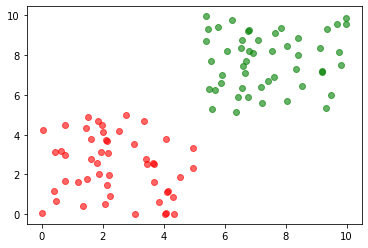

In [8]:
plt.scatter(data1[:,0], data1[:,1], color="red", alpha=0.6)
plt.scatter(data2[:,0], data2[:,1], color="green", alpha=0.6)
plt.show()

In [9]:
# fig = plt.figure(figsize=(10,10))
# for i in range(X_1.shape[0]):
#     plt.scatter(X_1[i,0], X_1[i,1], color="red", alpha=0.6)
# for i in range(X_2.shape[0]):
#     plt.scatter(X_2[i,0], X_2[i,1], color="green", alpha=0.6)
# plt.show()

# Trainning mô hình

In [10]:
# fit the model
clf = svm.SVC(kernel='linear')
clf.fit(data_total, Y_total)

SVC(kernel='linear')

# Xác định và vẽ hyperplane

In [11]:
print(clf.coef_)
print(clf.intercept_)
print(clf.n_support_)
print(clf.support_vectors_)

[[0.67255812 0.79931087]]
[-7.0075198]
[2 1]
[[4.96570602 3.33795784]
 [3.34251081 4.70272892]
 [5.59155278 5.31351266]]


In [12]:
#y = a1X1 + a2X2 + b 
#y = 0.9125X1 + 1.206X2 - 10.1823

    a0X0 + a1X1 + b = 0
<=> a1X1 = - a0X0 - b

<=> X1 = - (a0X0/a1 + b/a1)

<=> X1 = - (a0X0 + b) / a1

Xác định a,b và khởi tạo x0 ngẫu nhiên để vẽ đường thẳng

In [28]:
a = clf.coef_[0]
b = clf.intercept_[0]
x0 = np.linspace(0, 10)
#print(x1)

In [29]:
x1 = -1 * (a[0]*x0 + b) / a[1]
print(x0)
print(x1)

[ 0.          0.20408163  0.40816327  0.6122449   0.81632653  1.02040816
  1.2244898   1.42857143  1.63265306  1.83673469  2.04081633  2.24489796
  2.44897959  2.65306122  2.85714286  3.06122449  3.26530612  3.46938776
  3.67346939  3.87755102  4.08163265  4.28571429  4.48979592  4.69387755
  4.89795918  5.10204082  5.30612245  5.51020408  5.71428571  5.91836735
  6.12244898  6.32653061  6.53061224  6.73469388  6.93877551  7.14285714
  7.34693878  7.55102041  7.75510204  7.95918367  8.16326531  8.36734694
  8.57142857  8.7755102   8.97959184  9.18367347  9.3877551   9.59183673
  9.79591837 10.        ]
[8.76695172 8.59523285 8.42351398 8.25179511 8.08007624 7.90835738
 7.73663851 7.56491964 7.39320077 7.2214819  7.04976303 6.87804416
 6.70632529 6.53460642 6.36288756 6.19116869 6.01944982 5.84773095
 5.67601208 5.50429321 5.33257434 5.16085547 4.9891366  4.81741774
 4.64569887 4.47398    4.30226113 4.13054226 3.95882339 3.78710452
 3.61538565 3.44366679 3.27194792 3.10022905 2.92851018

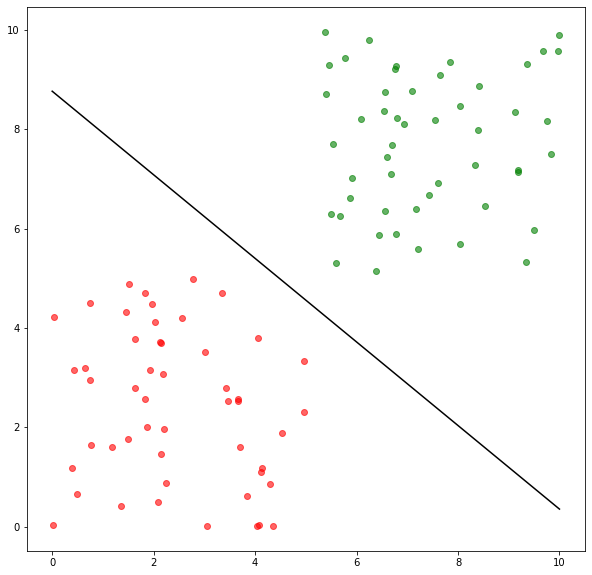

In [30]:
fig = plt.figure(figsize=(10,10))
plt.plot(x0, x1, 'k-')
plt.scatter(data1[:,0], data1[:,1], color="red", alpha=0.6)
plt.scatter(data2[:,0], data2[:,1], color="green", alpha=0.6)

# Xác định và vẽ đường thẳng biên

In [31]:
print(clf.support_vectors_)
print(clf.support_vectors_[0])

[[4.96570602 3.33795784]
 [3.34251081 4.70272892]
 [5.59155278 5.31351266]]
[4.96570602 3.33795784]


### Tìm đường thẳng song song với một đường thẳng và đi qua một điểm A
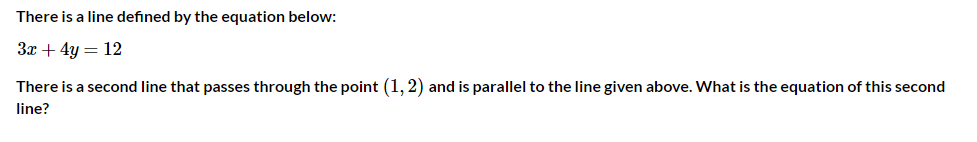
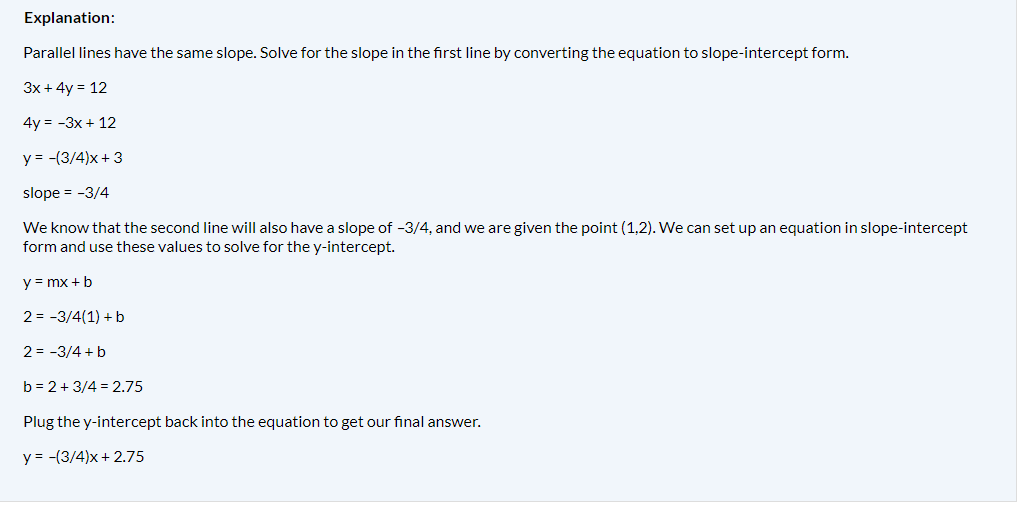

**Suy diễn**

có: a0X0 + a1X1 = b

tìm y = mx + b đi qua điểm P(p0,p1) dựa vào hình bên trên

Tính:

m => - a0/a1

b => - m*p0 + p1

In [32]:
# Tìm đường thẳng biên trên biên dưới
slope_intercept = - a[0]/a[1] # tương đương m

# với biên trên
pointUp = clf.support_vectors_[0]

bUp = (-1 * (slope_intercept * pointUp[0])) + pointUp[1]

#với biên dưới
pointDown = clf.support_vectors_[-1]

bDown = (-1 * (slope_intercept * pointDown[0])) + pointDown[1]

# 2 đường thẳng biên
print("Đường thẳng biên trên")
print('X1 = {}X0 + {}'.format(slope_intercept, bUp))
print("Đường thẳng biên dưới")
print('X1 = {}X0 {}'.format(slope_intercept, bDown))

Đường thẳng biên trên
X1 = -0.8414224574222839X0 + 7.516214401905683
Đường thẳng biên dưới
X1 = -0.8414224574222839X0 10.018370738270118


In [33]:
#Dựa trên x1 đã có sẵn, tìm ra x2 tương ứng với 2 biên để kẻ hàng
x1Up = (slope_intercept*x0) + bUp

x1Down = (slope_intercept*x0) + bDown


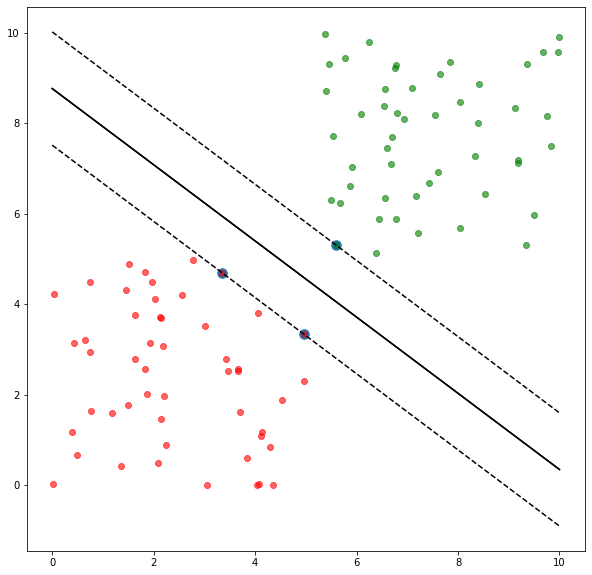

In [34]:
fig = plt.figure(figsize=(10,10))
plt.plot(x0, x1, 'k-')
plt.plot(x0, x1Up, 'k--')
plt.plot(x0, x1Down, 'k--')
plt.plot(x0, x1, 'k-')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],s=90)
plt.scatter(data1[:,0], data1[:,1], color="red", alpha=0.6)
plt.scatter(data2[:,0], data2[:,1], color="green", alpha=0.6)

plt.show()